In [11]:
cd C:\Users\mgratale\Desktop\BT\samples\NDsample

C:\Users\mgratale\Desktop\BT\samples\NDsample


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
num=10000
epnos=200
alpha0=100
alpha1=50
alpha2=75
alpha3=35
alpha4=60
cons=np.array([alpha1,alpha2,alpha3,alpha4])
cons=np.reshape(cons,(4,1))

In [96]:
noise=np.random.normal(0,epnos,num)

In [97]:
x1=np.random.uniform(0,100,num)
x2=np.random.uniform(10,50,num)
x3=np.random.uniform(70,120,num)
x4=np.random.uniform(60,160,num)

In [98]:
data=np.vstack([x1,x2,x3,x4])

In [99]:
y=(alpha0+np.dot(cons.T,data))+noise

In [100]:
y.shape,data.shape

((1L, 10000L), (4L, 10000L))

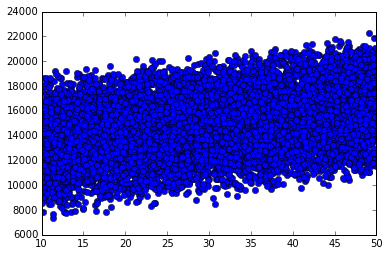

In [101]:
plt.plot(x2,y.T,'o')

In [102]:
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [103]:
xtrain,xtest,ytrain,ytest = train_test_split(data.T,y.T,test_size=0.2,random_state=10)

In [104]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8000L, 4L), (2000L, 4L), (8000L, 1L), (2000L, 1L))

In [105]:
model=linear_model.LinearRegression()

In [106]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
predictions = model.predict(xtest)

In [108]:
mean_squared_error(predictions, ytest)

40964.031844766425

In [94]:
model.coef_,model.intercept_

(array([[ 50.01017706,  74.99264451,  35.00301722,  59.99238084]]),
 array([ 100.11607564]))

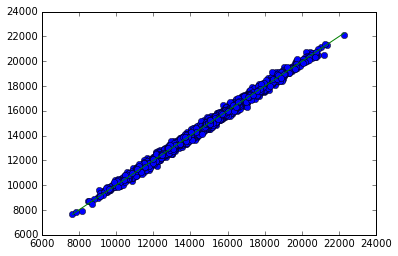

In [112]:
plt.plot(ytest,predictions,'o')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])